<a href="https://colab.research.google.com/github/Anish-AV/Autoencoder/blob/master/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BASIC AUTOENCODER**

In [0]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# **DENSE ARCHITECTURES**

In [0]:
#Defining the loss
def loss(preds, real):
  return tf.reduce_mean(tf.square(tf.subtract(preds, real)))

#Defining the training function
def train(loss, model, opt, original):
  with tf.GradientTape() as tape:
    preds = model(original)
    reconstruction_error = loss(preds, original)
  gradients = tape.gradient(reconstruction_error, model.trainable_variables)
  gradient_variables = zip(gradients, model.trainable_variables)
  opt.apply_gradients(gradient_variables)
  
  return reconstruction_error

def train_loop(model, opt, loss, dataset, epochs):
  for epoch in range(epochs):
    epoch_loss = 0
    for step, batch_features in enumerate(dataset):
      loss_values = train(loss, model, opt, batch_features)
      epoch_loss += loss_values
    model.loss.append(epoch_loss)
    print('Epoch {}/{}. Loss: {}'.format(epoch + 1, epochs, epoch_loss.numpy()))



In [0]:
#Function to visualize
def epochvsloss_curve(model):

  plt.plot(range(100), model.loss)
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

def visualization(x_test,pred):
  number = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for index in range(number):
      # display original
      ax = plt.subplot(2, number, index + 1)
      plt.imshow(x_test[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, number, index + 1 + number)
      plt.imshow(pred[index].numpy().reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()


#Loading the MNIST dataset    
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train / 255.

x_train = x_train.astype(np.float32)
x_train = np.reshape(x_train, (x_train.shape[0], 784))
x_test = np.reshape(x_test, (x_test.shape[0], 784))

training_dataset = tf.data.Dataset.from_tensor_slices(x_train).batch(256)

## **BASE MODEL**




Epoch 1/100. Loss: 8.83284854888916
Epoch 2/100. Loss: 5.966182231903076
Epoch 3/100. Loss: 5.52465295791626
Epoch 4/100. Loss: 5.291281223297119
Epoch 5/100. Loss: 5.171741008758545
Epoch 6/100. Loss: 5.103251934051514
Epoch 7/100. Loss: 5.047421455383301
Epoch 8/100. Loss: 5.00634765625
Epoch 9/100. Loss: 4.991136074066162
Epoch 10/100. Loss: 4.94113302230835
Epoch 11/100. Loss: 4.912147045135498
Epoch 12/100. Loss: 4.909770488739014
Epoch 13/100. Loss: 4.879371643066406
Epoch 14/100. Loss: 4.892151355743408
Epoch 15/100. Loss: 4.843492031097412
Epoch 16/100. Loss: 4.846443176269531
Epoch 17/100. Loss: 4.833789348602295
Epoch 18/100. Loss: 4.819358825683594
Epoch 19/100. Loss: 4.82764196395874
Epoch 20/100. Loss: 4.8104248046875
Epoch 21/100. Loss: 4.782903671264648
Epoch 22/100. Loss: 4.788758754730225
Epoch 23/100. Loss: 4.788688659667969
Epoch 24/100. Loss: 4.782848358154297
Epoch 25/100. Loss: 4.76148796081543
Epoch 26/100. Loss: 4.751699924468994
Epoch 27/100. Loss: 4.7438554763

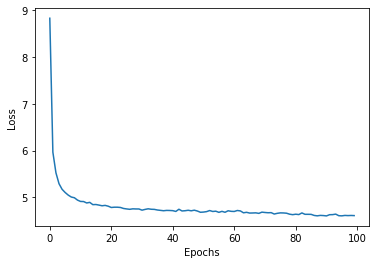

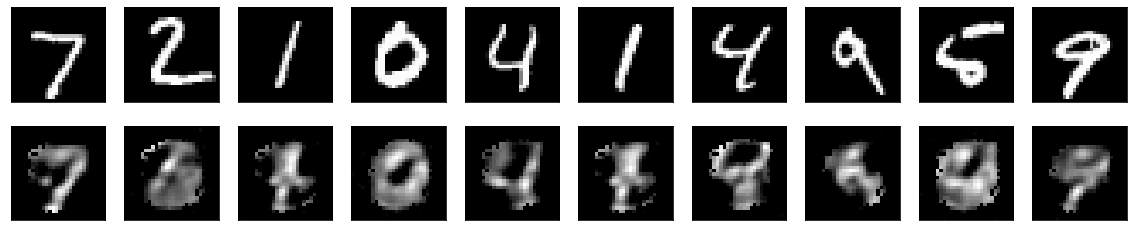

In [15]:
#Defining the Autoencoder
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed


#Calling the model 
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)

#visualization
epochvsloss_curve(model)
visualization(x_test,model(x_test))


## **ADDING 1 LAYER**

Epoch 1/100. Loss: 12.790238380432129
Epoch 2/100. Loss: 7.43595552444458
Epoch 3/100. Loss: 6.436902046203613
Epoch 4/100. Loss: 5.9771575927734375
Epoch 5/100. Loss: 5.670050144195557
Epoch 6/100. Loss: 5.489206790924072
Epoch 7/100. Loss: 5.348416805267334
Epoch 8/100. Loss: 5.245916843414307
Epoch 9/100. Loss: 5.211986064910889
Epoch 10/100. Loss: 5.097142219543457
Epoch 11/100. Loss: 5.043515682220459
Epoch 12/100. Loss: 5.010563373565674
Epoch 13/100. Loss: 4.992433071136475
Epoch 14/100. Loss: 4.970768451690674
Epoch 15/100. Loss: 4.901852130889893
Epoch 16/100. Loss: 4.9052276611328125
Epoch 17/100. Loss: 4.866041660308838
Epoch 18/100. Loss: 4.854208469390869
Epoch 19/100. Loss: 4.863442897796631
Epoch 20/100. Loss: 4.836299419403076
Epoch 21/100. Loss: 4.773200035095215
Epoch 22/100. Loss: 4.793542861938477
Epoch 23/100. Loss: 4.763058662414551
Epoch 24/100. Loss: 4.756602764129639
Epoch 25/100. Loss: 4.742270469665527
Epoch 26/100. Loss: 4.747139930725098
Epoch 27/100. Loss:

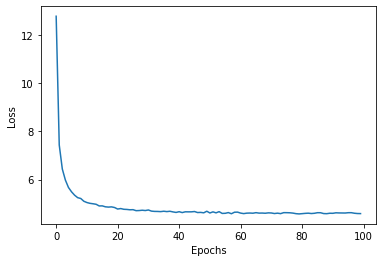

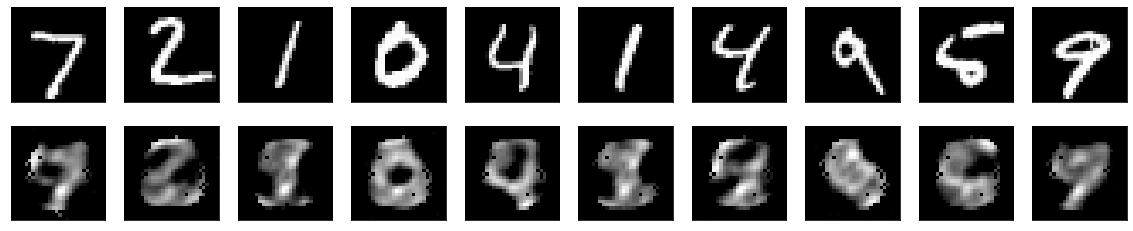

In [17]:
#Defining the architecture of our Autoencoder
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
    
    def call(self, input_features):

        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Calling the model
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=1e-2)
train_loop(model, opt, loss, training_dataset, 100)


#visualization
epochvsloss_curve(model)
visualization(x_test,model(x_test))

## **ADDING 1 LAYER, CHANGING THE LEARNING RATE AND IMPLEMENTING SANDWICH DIMENSIONS**

Epoch 1/100. Loss: 10.081877708435059
Epoch 2/100. Loss: 5.646214008331299
Epoch 3/100. Loss: 4.890511512756348
Epoch 4/100. Loss: 4.53610372543335
Epoch 5/100. Loss: 4.217995643615723
Epoch 6/100. Loss: 4.035379886627197
Epoch 7/100. Loss: 3.897029399871826
Epoch 8/100. Loss: 3.786707878112793
Epoch 9/100. Loss: 3.687671661376953
Epoch 10/100. Loss: 3.6094741821289062
Epoch 11/100. Loss: 3.529700756072998
Epoch 12/100. Loss: 3.4632112979888916
Epoch 13/100. Loss: 3.406853675842285
Epoch 14/100. Loss: 3.360226631164551
Epoch 15/100. Loss: 3.3174140453338623
Epoch 16/100. Loss: 3.2774410247802734
Epoch 17/100. Loss: 3.245788097381592
Epoch 18/100. Loss: 3.216744899749756
Epoch 19/100. Loss: 3.190133571624756
Epoch 20/100. Loss: 3.1665191650390625
Epoch 21/100. Loss: 3.1454386711120605
Epoch 22/100. Loss: 3.1257665157318115
Epoch 23/100. Loss: 3.105797290802002
Epoch 24/100. Loss: 3.0818448066711426
Epoch 25/100. Loss: 3.0591437816619873
Epoch 26/100. Loss: 3.04020094871521
Epoch 27/100.

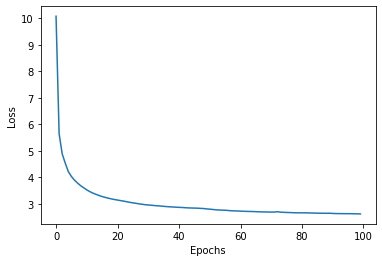

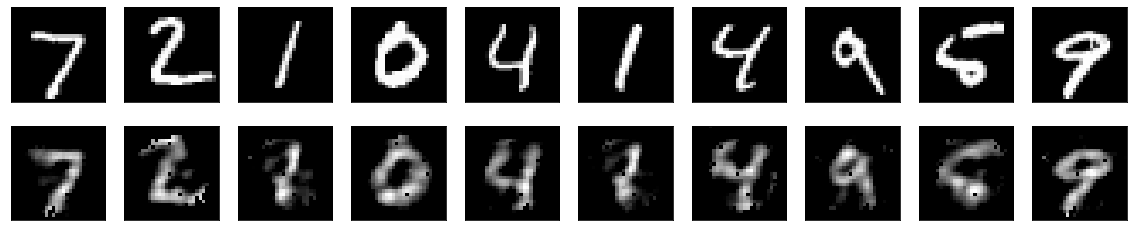

In [18]:
#Defining the autoencoder Architecture
class Encoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=intermediate_dim/4, activation=tf.nn.relu)
    
    def call(self, input_features):

        activation1 = self.hidden_layer1(input_features)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Decoder(tf.keras.layers.Layer):
    def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer1 = tf.keras.layers.Dense(units=intermediate_dim/2, activation=tf.nn.relu)
        self.hidden_layer2 = tf.keras.layers.Dense(units=intermediate_dim, activation=tf.nn.relu)
        self.output_layer = tf.keras.layers.Dense(units=original_dim, activation=tf.nn.relu)
  
    def call(self, code):
        activation1 = self.hidden_layer1(code)
        activation2 = self.hidden_layer2(activation1)
        return self.output_layer(activation2)

class Autoencoder(tf.keras.Model):
  def __init__(self, intermediate_dim, original_dim):
    super(Autoencoder, self).__init__()
    self.loss = []
    self.encoder = Encoder(intermediate_dim=intermediate_dim)
    self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)

  def call(self, input_features):
    code = self.encoder(input_features)
    reconstructed = self.decoder(code)
    return reconstructed

#Calling the model
model = Autoencoder(intermediate_dim=128, original_dim=784)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
train_loop(model, opt, loss, training_dataset, 100)


#visualization
epochvsloss_curve(model)
visualization(x_test,model(x_test))

# **CNN ARCHITECTURES**

In [0]:
#Function to visualize
def visualization(x_test,pred):
  number = 10  # how many digits we will display
  plt.figure(figsize=(20, 4))
  for index in range(number):
      # display original
      ax = plt.subplot(2, number, index + 1)
      plt.imshow(x_test[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # display reconstruction
      ax = plt.subplot(2, number, index + 1 + number)
      plt.imshow(pred[index].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()
  
#Loading the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

## **CNN BASE MODEL**

Epoch 1/100
469/469 [==============================] - 3s 7ms/step - loss: 0.6847 - val_loss: 0.6821
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6778 - val_loss: 0.6722
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6610 - val_loss: 0.6444
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.6025 - val_loss: 0.5405
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4839 - val_loss: 0.4594
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4464 - val_loss: 0.4396
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4265 - val_loss: 0.4193
Epoch 8/100
469/469 [==============================] - 3s 6ms/step - loss: 0.4061 - val_loss: 0.3980
Epoch 9/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3848 - val_loss: 0.3761
Epoch 10/100
469/469 [==============================] - 3s 6ms/step - loss: 0.3635 - val_lo

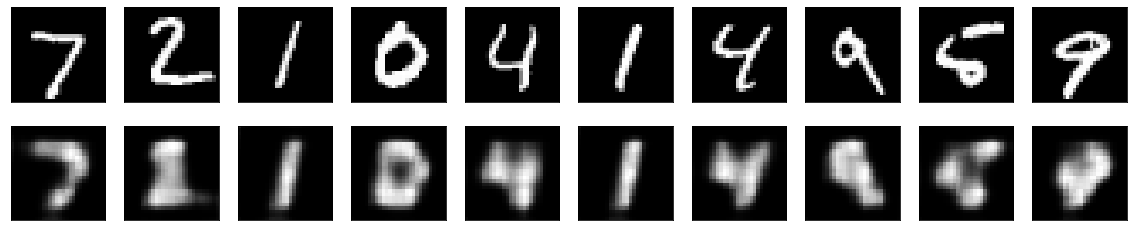

In [21]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1))

#encoder
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#calling the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


#training the model
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

#Predictions
predict=autoencoder.predict(x_test)

#Visualization
visualization(x_test,predict)



## **ADDING 1 LAYER AND CHANGING THE OPTIMIZER TO ADAM**

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 8)           0   

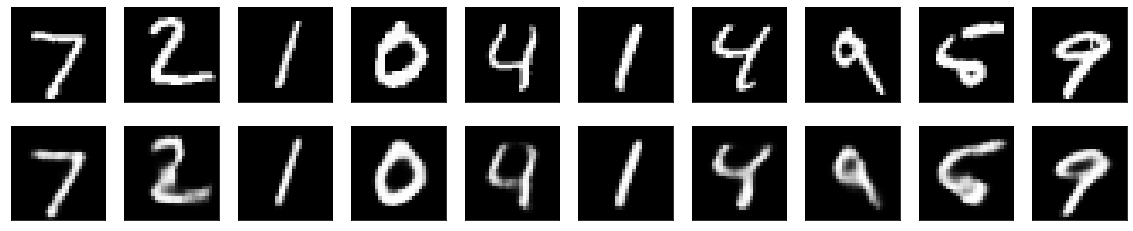

In [25]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

#encoder
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


#decoder
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2,2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#calling the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

#training the model
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

#Predictions
predict=autoencoder.predict(x_test)

#Visualization
visualization(x_test,predict)


## **CNN COMPLEX**

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 14, 14, 8)         3208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 8)         32        
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 8)           0   

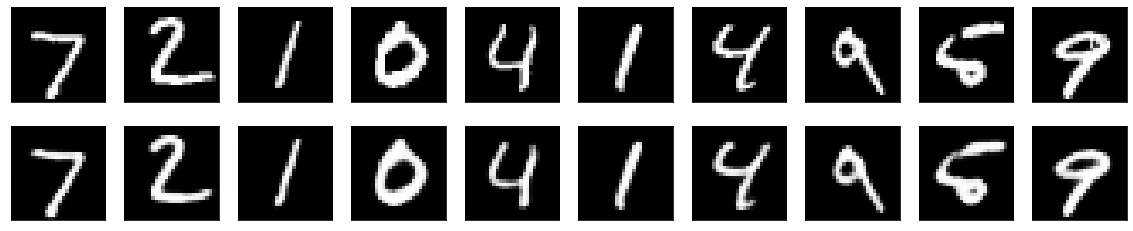

In [24]:
#Defining the autoencoder architecture
input_img = tf.keras.layers.Input(shape=(28, 28, 1)) 

#encoder
x = tf.keras.layers.Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

#decoder

x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (5, 5), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Dense(16, activation='relu')(x)

decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

#calling the model
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

#training the model
autoencoder.fit(x_train, x_train, epochs=100, batch_size=128, 
                shuffle=True, validation_data=(x_test, x_test), 
                callbacks=[tf.keras.callbacks.TensorBoard(log_dir='./tmp/autoencoder')])

#Predictions
predict=autoencoder.predict(x_test)

#Visualization
visualization(x_test,predict)